In [26]:
import scib
import scanpy
import anndata as ad
import os
import pickle
import pickle5
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import scipy.stats

In [2]:
name='allk20XA_02_dca_over'
modelsavepath='/mnt/external_ssd/xinyi/models/train_gae_starmap/'+name
plotsavepath='/mnt/external_ssd/xinyi/plots/train_gae_starmap/'+name
datadir='/home/xinyiz/2021-01-13-mAD-test-dataset'
plotepoch=9990
inverseAct='leakyRelu'
n_neighbors=10
min_dist=0.25
n_pcs=40 #for clustering
resolution=0.1
savenameAdd=''
plot_sample_X=['logminmax']
plot_samples={'disease13':'AD_mouse9494','control13':'AD_mouse9498','disease8':'AD_mouse9723','control8':'AD_mouse9735'}

In [3]:
#loading data for overparam 6000
#load latent
with open(os.path.join(modelsavepath,str(plotepoch)), 'rb') as output:
    mulist=pickle5.load(output)
#load data
scaleddata=scanpy.read_h5ad(datadir+'/2020-12-27-starmap-mAD-raw.h5ad')

xcorr = plot_sample_X[0]
#load leiden clusters--change
sampledir=os.path.join(plotsavepath,'combined'+xcorr)
if inverseAct:
    sampledir+='_beforeAct'
clustersavedir=os.path.join(sampledir,'cluster')
savenamecluster='leiden_nn'+str(n_neighbors)+'mdist0'+str(int(min_dist*100))+'n_pcs'+str(n_pcs)+'res'+str(resolution)+'epoch'+str(plotepoch)
with open(os.path.join(clustersavedir,savenamecluster), 'rb') as output:
    clusterRes=pickle5.load(output)

latents=None
celltype_broad=None
celltype_sub=None
region=None
samplenameList=None
sobj_coord_np=None

for s in plot_samples.keys():
    sampleidx=plot_samples[s]        
    samplename=s+'X_'+xcorr
    muplot=np.copy(mulist[samplename])

    if latents is None:
        latents=muplot
        celltype_broad=scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'top_level']
        celltype_sub=scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'cell_type_label']
        region=scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'region']
        sobj_coord_np=scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,['x','y']].to_numpy()
        samplenameList=np.repeat(s,muplot.shape[0])
    else:
        latents=np.vstack((latents,muplot))
        celltype_broad=np.concatenate((celltype_broad,scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'top_level']),axis=None)
        celltype_sub=np.concatenate((celltype_sub,scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'cell_type_label']),axis=None)
        region=np.concatenate((region,scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,'region']),axis=None)
        sobj_coord_np=np.concatenate((sobj_coord_np,scaleddata.obs.loc[scaleddata.obs['sample']==sampleidx,['x','y']].to_numpy()),axis=0)
        samplenameList=np.concatenate((samplenameList,np.repeat(s,muplot.shape[0])),axis=None)
       

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig_index' was written without encoding metadata.
  return read_elem(dataset)
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/sample' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/sample' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/area' was written 

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/AD_mouse9723_morph/plaque' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/AD_mouse9723_morph/region' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/AD_mouse9723_morph/tau' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/AD_mouse9735_morph' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/label_rgb_dict/OL2' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/label_rgb_dict/OL3' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/label_rgb_dict/S1' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/label_rgb_dict/S2' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/py

In [4]:
adata_over=ad.AnnData(latents)
adata_over.obs['celltype_broad']=celltype_broad
adata_over.obs['leiden']=clusterRes
adata_over.obs['samples']=samplenameList
scanpy.tl.pca(adata_over, svd_solver='arpack')

In [5]:
scib.metrics.kBET(adata_over,'samples','leiden',verbose=True)

nan

In [6]:
over01=scib.metrics.silhouette_batch(adata_over,'samples','leiden','X_pca',verbose=True,return_all=True)

mean silhouette per group:        silhouette_score
group                  
0              0.948467
1              0.921189
2              0.893706
3              0.920813
4              0.914021
5              0.910687
6              0.875364
7              0.901802


In [7]:
scib.metrics.silhouette_batch(adata_over,'samples','celltype_broad','X_pca',verbose=True)

mean silhouette per group:        silhouette_score
group                  
Astro          0.960838
CA1            0.868374
CA2            0.919746
CA3            0.881051
DG             0.904354
Endo           0.960684
Ex             0.948401
Inhi           0.944683
LHb            0.843512
Micro          0.925539
OPC            0.954621
Oligo          0.939662
SMC            0.938514


0.9223061525063011

In [8]:
savenamecluster='leiden_nn'+str(n_neighbors)+'mdist0'+str(int(min_dist*100))+'n_pcs'+str(n_pcs)+'res'+str(0.2)+'epoch'+str(plotepoch)
with open(os.path.join(clustersavedir,savenamecluster), 'rb') as output:
    clusterRes015=pickle5.load(output)

In [11]:
adata_over.obs['leiden02']=clusterRes015

In [12]:
over02=scib.metrics.silhouette_batch(adata_over,'samples','leiden02','X_pca',verbose=True,return_all=True)

mean silhouette per group:        silhouette_score
group                  
0              0.885147
1              0.914869
10             0.836897
2              0.900399
3              0.908247
4              0.938657
5              0.898260
6              0.859923
7              0.931271
8              0.899674
9              0.918819


In [51]:
#loading data for underparam 1024
#load latent
with open('/mnt/external_ssd/xinyi/models/server1/allk20XA_01_dca_9990', 'rb') as output:
    mulist=pickle.load(output)

xcorr = plot_sample_X[0]
#load leiden clusters--change
savenamecluster='leiden_nn'+str(n_neighbors)+'mdist0'+str(int(min_dist*100))+'n_pcs'+str(n_pcs)+'res'+str(resolution)+'epoch'+str(plotepoch)
with open('/mnt/external_ssd/xinyi/models/server1/allk20XA_01_dca_'+savenamecluster, 'rb') as output:
    clusterRes_under=pickle.load(output)

latents_under=None

for s in plot_samples.keys():
    sampleidx=plot_samples[s]        
    samplename=s+'X_'+xcorr
    muplot=np.copy(mulist[samplename])

    if latents_under is None:
        latents_under=muplot
    else:
        latents_under=np.vstack((latents_under,muplot))
       

In [14]:
adata_under=ad.AnnData(latents_under)
adata_under.obs['celltype_broad']=celltype_broad
adata_under.obs['leiden']=clusterRes_under
adata_under.obs['samples']=samplenameList
scanpy.tl.pca(adata_under, svd_solver='arpack')

In [15]:
under01=scib.metrics.silhouette_batch(adata_under,'samples','leiden','X_pca',verbose=True,return_all=True)

mean silhouette per group:        silhouette_score
group                  
0              0.906686
1              0.850256
10             0.728849
11             0.905255
12             0.815378
13             0.917969
14             0.822960
15             0.866289
2              0.865573
3              0.947725
5              0.817211
6              0.787213
7              0.882489
9              0.924031


In [16]:
scib.metrics.silhouette_batch(adata_under,'samples','celltype_broad','X_pca',verbose=True)

mean silhouette per group:        silhouette_score
group                  
Astro          0.972214
CA1            0.928912
CA2            0.916906
CA3            0.946624
DG             0.955760
Endo           0.978988
Ex             0.959318
Inhi           0.970845
LHb            0.887076
Micro          0.967517
OPC            0.967947
Oligo          0.967494
SMC            0.952674


0.9517132874131841

In [17]:
under01[1].to_numpy()

array([[0.90668641],
       [0.85025597],
       [0.72884874],
       [0.90525519],
       [0.8153777 ],
       [0.917969  ],
       [0.82296014],
       [0.86628862],
       [0.86557279],
       [0.94772499],
       [0.81721088],
       [0.78721343],
       [0.8824886 ],
       [0.92403086]])

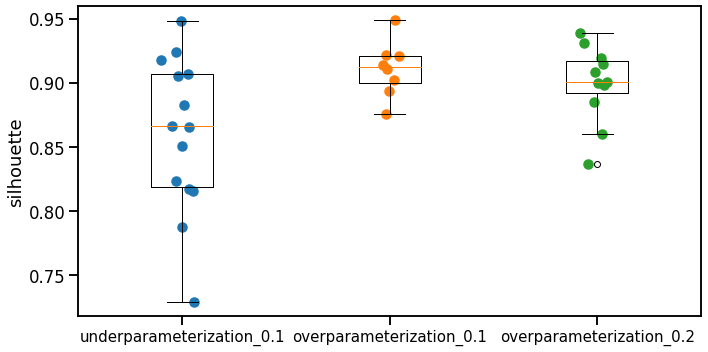

In [23]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.boxplot([under01[1].to_numpy().flatten(),over01[1].to_numpy().flatten(),over02[1].to_numpy().flatten()],labels=["underparameterization_0.1", "overparameterization_0.1","overparameterization_0.2"])
plt.xticks(fontsize=15)
plt.ylabel('silhouette')

plt.scatter(np.random.normal( 1, 0.04, under01[1].size),under01[1].to_numpy().flatten())
plt.scatter(np.random.normal( 2, 0.04, over01[1].size),over01[1].to_numpy().flatten())
plt.scatter(np.random.normal( 3, 0.04, over02[1].size),over02[1].to_numpy().flatten())
plt.show()

In [37]:
def entropyBatch(dataset, batch, nsample=100, ncell=100, k=50):
    if dataset.shape[0]<k/2:
        return -1
    entropy=0
    np.random.seed(3)
    batchID=np.unique(batch)
    nbrs=NearestNeighbors(n_neighbors=k+1).fit(dataset)
    for b in range(nsample):
        randomIdx=np.random.choice(dataset.shape[0],min(ncell,dataset.shape[0]),replace=False)
        distances, indices = nbrs.kneighbors(dataset[randomIdx])
        for i in range(ncell):
            _,counts=np.unique(batch[indices[i,1:]],return_counts=True)
            entropy+=scipy.stats.entropy(counts/np.sum(counts),base=2)
    return entropy/(nsample*ncell)
    


In [32]:
under01E=entropyBatch(latents_under,adata_under.obs['samples'])
under01E

0.7931948431022469

In [33]:
overE=entropyBatch(latents,adata_over.obs['samples'])
overE

1.1189530815713182

In [38]:
under01E_byClusters=np.zeros(np.unique(adata_under.obs['leiden']).size)
for i in range(under01E_byClusters.size):
    c=np.unique(adata_under.obs['leiden'])[i]
    under01E_byClusters[i]=entropyBatch(latents_under[adata_under.obs['leiden'].to_numpy()==c],adata_under.obs['samples'].to_numpy()[adata_under.obs['leiden'].to_numpy()==c])
    
under01E_byClusters=under01E_byClusters[under01E_byClusters!=-1]

In [39]:
over01E_byClusters=np.zeros(np.unique(adata_over.obs['leiden']).size)
for i in range(over01E_byClusters.size):
    c=np.unique(adata_over.obs['leiden'])[i]
    over01E_byClusters[i]=entropyBatch(latents[adata_over.obs['leiden'].to_numpy()==c],adata_over.obs['samples'].to_numpy()[adata_over.obs['leiden'].to_numpy()==c])
    
over01E_byClusters=over01E_byClusters[over01E_byClusters!=-1]

In [42]:
over02E_byClusters=np.zeros(np.unique(adata_over.obs['leiden02']).size)
for i in range(over02E_byClusters.size):
    c=np.unique(adata_over.obs['leiden02'])[i]
    over02E_byClusters[i]=entropyBatch(latents[adata_over.obs['leiden02'].to_numpy()==c],adata_over.obs['samples'].to_numpy()[adata_over.obs['leiden02'].to_numpy()==c])
    
over02E_byClusters=over02E_byClusters[over02E_byClusters!=-1]

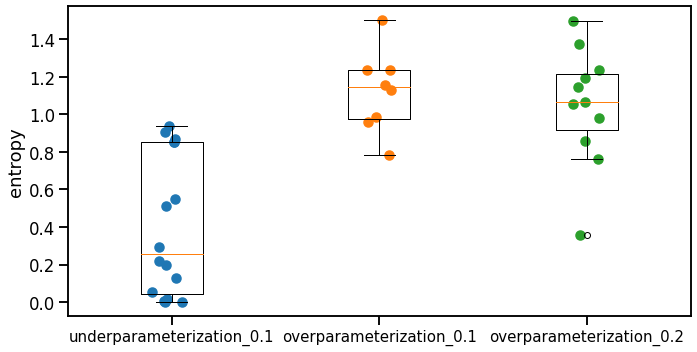

In [43]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.boxplot([under01E_byClusters,over01E_byClusters,over02E_byClusters],labels=["underparameterization_0.1", "overparameterization_0.1","overparameterization_0.2"])
plt.xticks(fontsize=15)
plt.ylabel('entropy')

plt.scatter(np.random.normal( 1, 0.04, under01E_byClusters.size),under01E_byClusters)
plt.scatter(np.random.normal( 2, 0.04, over01E_byClusters.size),over01E_byClusters)
plt.scatter(np.random.normal( 3, 0.04, over02E_byClusters.size),over02E_byClusters)
plt.show()

## scRNAseq

In [50]:
with open('/mnt/external_ssd/xinyi/models/train_gae_scrnaseq/allk20XA_02_dca_over_FCXonly_scrnaseq_Bone_Marrow_latent', 'rb') as output:
    latents_scrnaseq=pickle5.load(output)

In [71]:
scrnaseqdata=scanpy.read_h5ad('/mnt/external_ssd/xinyi/staci_validation/scrnaseq/Immune_ALL_human.h5ad')
scrnaseqdata=scrnaseqdata[:,np.array(np.sum(scrnaseqdata.layers['counts'],axis=0)>3).flatten()]
data=scrnaseqdata[scrnaseqdata.obs['tissue']=='Bone_Marrow']

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/batch' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/batch' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element

In [72]:

adata_scrnaseq=ad.AnnData(latents_scrnaseq)
adata_scrnaseq.obs['samples']=data.obs['batch'].to_numpy()
scanpy.tl.pca(adata_scrnaseq, svd_solver='arpack')

In [57]:
scanpy.tl.pca(scrnaseqdata)

In [77]:
entropyBatch(latents_scrnaseq,adata_scrnaseq.obs['samples'])

0.8242635629003753

In [78]:
entropyBatch(data.layers['counts'],adata_scrnaseq.obs['samples'])

0.7029334002169173

In [79]:
entropyBatch(latents_scrnaseq,data.obs['final_annotation'].to_numpy())

0.5777697197537487

In [80]:
entropyBatch(data.layers['counts'],data.obs['final_annotation'].to_numpy())

0.7678285083982911

In [ ]:
scanpy.tl.pca(data)

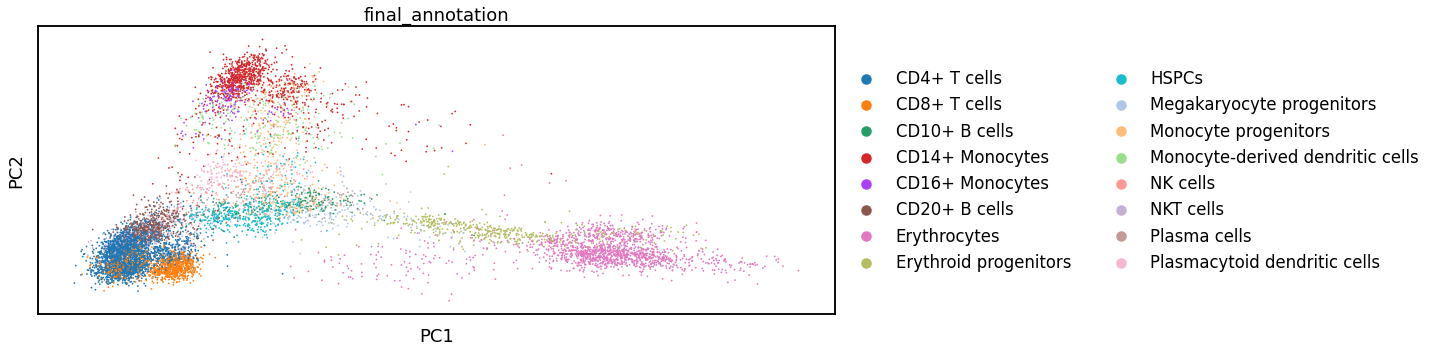

In [104]:
plt.rcParams["figure.figsize"] = [20, 5]
scanpy.pl.pca(data,color='final_annotation')

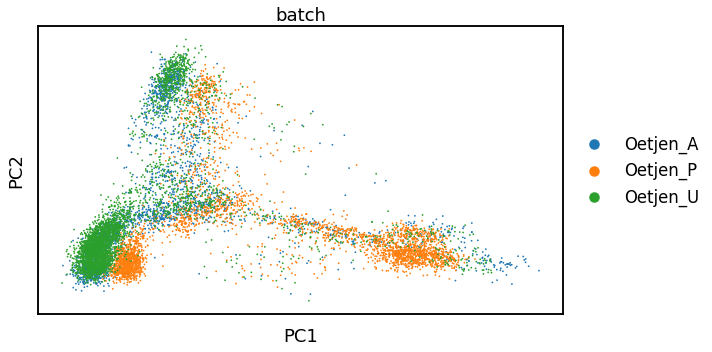

In [106]:
plt.rcParams["figure.figsize"] = [10, 5]
scanpy.pl.pca(data,color='batch')

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


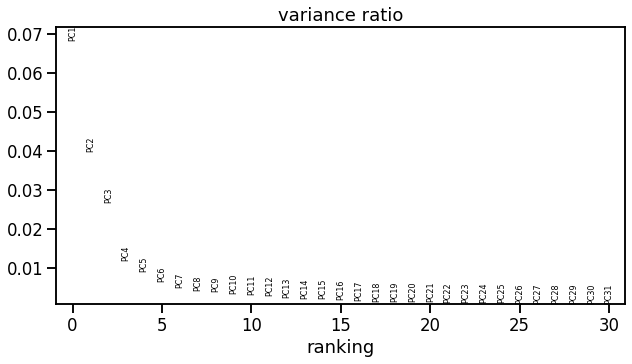

In [88]:
scanpy.pl.pca_variance_ratio(data)

<BarContainer object of 30 artists>

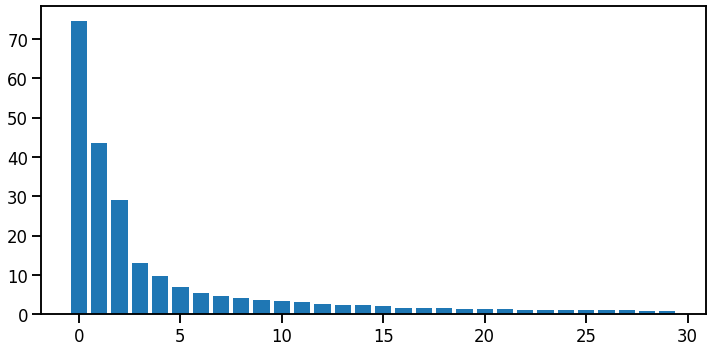

In [91]:
plt.bar(np.arange(30),data.uns['pca']['variance'][:30])

/home/xinyiz/anaconda3/envs/torch_r/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


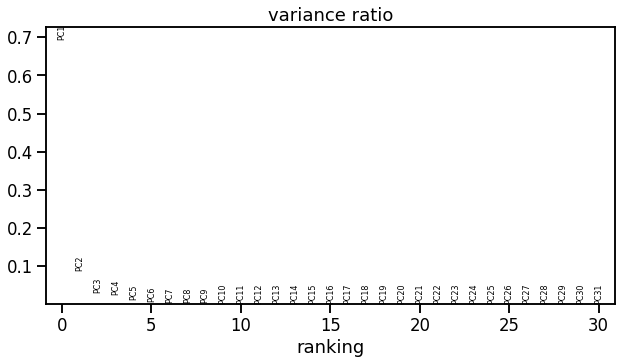

In [89]:
scanpy.pl.pca_variance_ratio(adata_scrnaseq)

<BarContainer object of 30 artists>

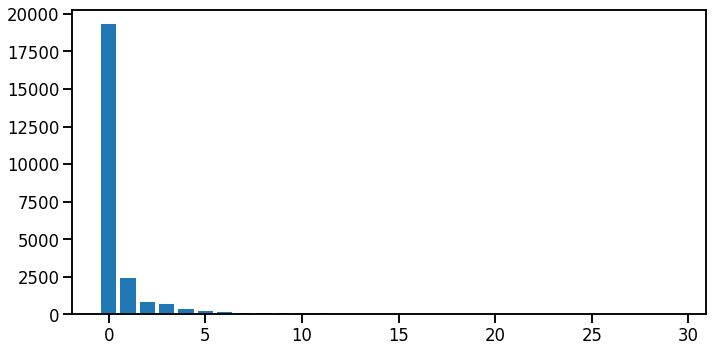

In [92]:
plt.bar(np.arange(30),adata_scrnaseq.uns['pca']['variance'][:30])